<a href="https://colab.research.google.com/github/skngetich/msc-dsa-mod-2/blob/main/Tomato_classification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Load Dataset

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


Extract zip files to the `content` directory

In [ ]:
!unzip /gdrive/MyDrive/dataset/plant-dataset.zip

In [ ]:
#Below are the path to the tomato image dataset
train_path = '/content/New Plant Diseases Dataset(Augmented)/train'
valid_path = '/content/New Plant Diseases Dataset(Augmented)/valid'

## Import packages

In [ ]:
import tensorflow as tf

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten

#Keras model
from tensorflow.keras.models import Model
from tensorflow.keras.models import Sequential
from tensorflow.keras.models import load_model

#Pre-trained models
from tensorflow.keras.applications.densenet import DenseNet121

#Preprocessing classes and function
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img

#Optimisers - modifies the attributes of the neural network such as weights and learning rates
from tensorflow.keras.optimizers import RMSprop

from tensorflow.keras.callbacks import EarlyStopping

import numpy as np
import matplotlib.pyplot as plt

from glob import glob

In [ ]:
#Check how many GPU are available.

print("Number GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

Num GPUs Available:  1


In [ ]:
 #Size to resize images to after they are read from disk.
 #Default is 256,256 
IMAGE_SIZE = [224, 224]
BATCH_SIZE = 32

## Image pre-processing

ImageDataGenerator is used to do Image data augmentation

**Image data augmentation** is used to expand the training dataset in order to improve the performance and ability of the model to generalize.

**Image data augmentation** is supported in the Keras deep learning library via the ImageDataGenerator class.

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [ ]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory(train_path,
                                                 target_size = IMAGE_SIZE,
                                                 batch_size = BATCH_SIZE,
                                                 class_mode = 'categorical')

test_set = test_datagen.flow_from_directory(valid_path,
                                            target_size = IMAGE_SIZE,
                                            batch_size = BATCH_SIZE,
                                            class_mode = 'categorical')

Found 18345 images belonging to 10 classes.
Found 4585 images belonging to 10 classes.


## Load the pre-trained model

Load the pre-trained model
We are using tranfer-learning

When loading a given model, the **`include_top`** argument can be set to **False**, 
in which case the fully-connected output layers of the model used to make predictions is not loaded,allowing a new output layer to be added and trained

[More info on tranfer learning](https://machinelearningmastery.com/how-to-use-transfer-learning-when-developing-convolutional-neural-network-models/)

In [ ]:
densenet = DenseNet121(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)


29097984/29084464 [==============================] - 0s 0us/step


In [ ]:
for layer in densenet.layers:
    layer.trainable = False

In [ ]:
# our layers - you can add more if you want
x = Flatten()(densenet.output)

In [ ]:
#Select the folders using glob package
folders = glob('/content/New Plant Diseases Dataset(Augmented)/train/*')
folders

['/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus']

In [ ]:

prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=densenet.input, outputs=prediction)

In [ ]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 zero_padding2d (ZeroPadding2D)  (None, 230, 230, 3)  0          ['input_1[0][0]']                
                                                                                                  
 conv1/conv (Conv2D)            (None, 112, 112, 64  9408        ['zero_padding2d[0][0]']         
                                )                                                                 
                                                                                              

# Add optimiser

In [ ]:
optimizer = RMSprop(0.001) #learning rate = 0.001

model.compile(
  loss = 'categorical_crossentropy',
  optimizer = optimizer,
  metrics = ['accuracy']
)

## Train the model

In [ ]:
# fit the model
es = EarlyStopping(patience=20, restore_best_weights=True)

r = model.fit(
  training_set,
  validation_data=test_set,
  epochs=30,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set),
  callbacks=es
) 

Epoch 1/30
574/574 [==============================] - 329s 544ms/step - loss: 4.2576 - accuracy: 0.7022 - val_loss: 2.4594 - val_accuracy: 0.8033
Epoch 2/30
574/574 [==============================] - 292s 508ms/step - loss: 1.8826 - accuracy: 0.8530 - val_loss: 1.3867 - val_accuracy: 0.8792
Epoch 3/30
574/574 [==============================] - 289s 503ms/step - loss: 1.5348 - accuracy: 0.8854 - val_loss: 3.8454 - val_accuracy: 0.7976
Epoch 4/30
574/574 [==============================] - 289s 503ms/step - loss: 1.2794 - accuracy: 0.9041 - val_loss: 4.5734 - val_accuracy: 0.7871
Epoch 5/30
574/574 [==============================] - 291s 507ms/step - loss: 1.1277 - accuracy: 0.9168 - val_loss: 1.4455 - val_accuracy: 0.9040
Epoch 6/30
574/574 [==============================] - 292s 508ms/step - loss: 1.0409 - accuracy: 0.9248 - val_loss: 1.6469 - val_accuracy: 0.9038
Epoch 7/30
574/574 [==============================] - 292s 508ms/step - loss: 0.9190 - accuracy: 0.9334 - val_loss: 1.1431 -

## Check model validation accuracy

In [ ]:
valid_loss, valid_acc = model.evaluate_generator(test_set, steps=len(test_set))
print(f"Final validation accuracy: {valid_acc*100:.2f}%")

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  """Entry point for launching an IPython kernel.


Final validation accuracy: 93.91%


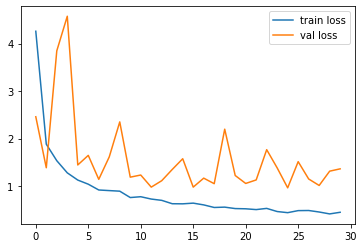

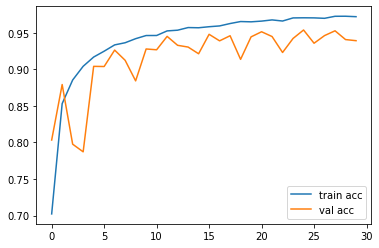

<Figure size 432x288 with 0 Axes>

In [ ]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['accuracy'], label='train acc')
plt.plot(r.history['val_accuracy'], label='val acc')
plt.legend()
plt.show()
plt.savefig('Acc-Val_acc')

## Save model

In [ ]:
model.save('/gdrive/MyDrive/dataset/model_densenet.h5')
print("Model saved successfully...")

Model saved successfully...


# Predict tomato plant disease classification using the model

In [ ]:
def predict(model, img):
    img_array = tf.keras.preprocessing.image.img_to_array(images[i])
    img_array = tf.expand_dims(img_array, 0)

    predictions = model.predict(img_array)

    predicted_class = class_names[np.argmax(predictions[0])]
    confidence = round(100 * (np.max(predictions[0])), 2)
    return predicted_class, confidence

In [ ]:
y_pred = model.predict(test_set)

In [ ]:
y_pred = np.argmax(y_pred, axis=1)
y_pred.plot

In [ ]:
class_names = []

for i in range(0,len(folders)):
  class_names.append(folders[i].lstrip('/content/New Plant Diseases Dataset(Augmented)/train/'))

class_names = np.array(class_names)
class_names

array(['Tomato___Bacterial_spot', 'Tomato___Septoria_leaf_spot',
       'Tomato___healthy', 'Tomato___Target_Spot', 'Tomato___Leaf_Mold',
       'Tomato___Late_blight', 'Tomato___Early_blight',
       'Tomato___Spider_mites Two-spotted_spider_mite',
       'Tomato___Tomato_Yellow_Leaf_Curl_Virus',
       'Tomato___Tomato_mosaic_virus'], dtype='<U45')

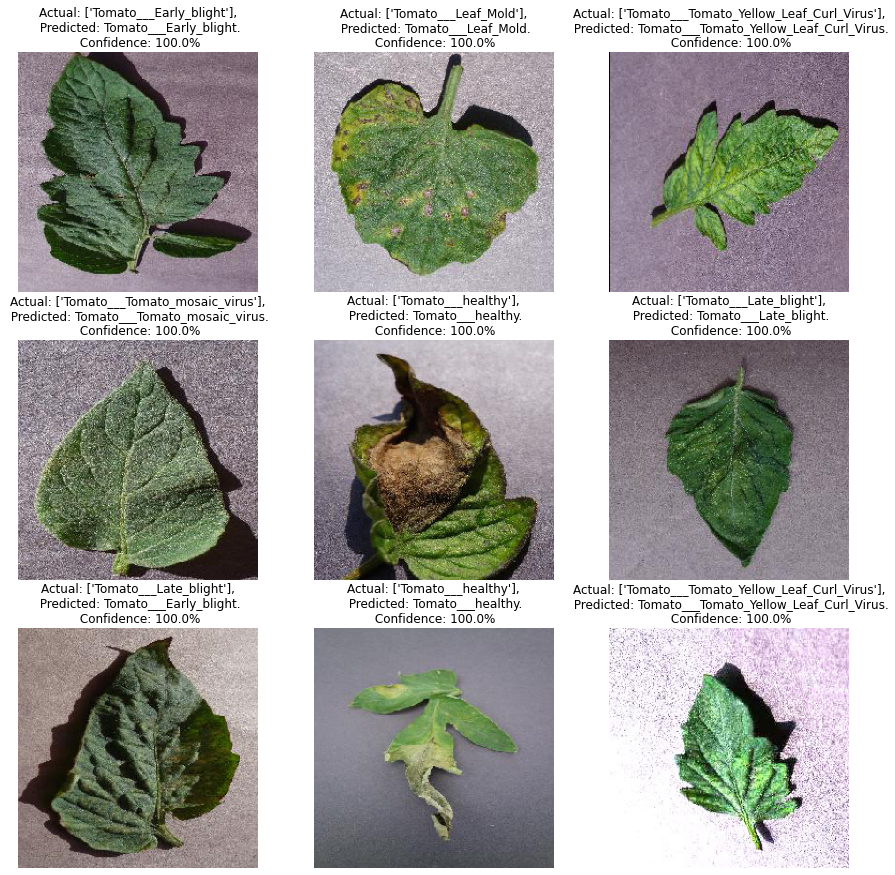

In [ ]:
plt.figure(figsize=(15, 15))
for images, labels in test_set:
    for i in range(9):
        ax = plt.subplot(3, 3, i + 1) 
        plt.imshow(images[i])
        
        predicted_class, confidence = predict(model, images[i])
       
        actual_class = class_names[np.where(labels[i]==1)]
        
        plt.title(f"Actual: {actual_class},\n Predicted: {predicted_class}.\n Confidence: {confidence}%")
        
        plt.axis("off")
    break